<a href="https://colab.research.google.com/github/shubh1176/MAGIC_Gamma_Telescope/blob/main/magic_gamma_model01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the start i will import the necessary and basic libraries that i will be using.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now let's read the data in the csv file and examine it

In [9]:
pd.read_csv("magic04.data")

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


First thing that comes to our attention is that the labels are missing so first we will visit the [website](https://archive.ics.uci.edu/ml/datasets/MAGIC+Gamma+Telescope) and there i found the necessary labels info which we can set as data lables.

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)

g = gamma (signal): 12332

h = hadron (background): 6688


In [10]:
# adding labels to dataset

label_column = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

# df is dataframe
df = pd.read_csv("magic04.data", names = label_column)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Now we can see that we added the label column to the dataset by assigning each row a name

In [11]:
df['class'].unique()

array(['g', 'h'], dtype=object)

now, what i did above is to check for the uniques values of class as our aim to classify whether it is Gamma(g) or Hadron(h)



also, **dtype=object** is a parameter used in NumPy arrays to indicate that the data type of the array is "object", which essentially means that the array can contain elements of any data type, including strings, numbers, other arrays, and even custom objects.

now, we know that we have only two values in the "class". let us consider a case where we have multiple possible values in the "class" then we would have to pick one particular value to be set as True and others as False(since computer only understand binary(0 or 1). now coming back to our dataset we have two possible vales only so it wouldn't matter what we put as 1 or 0 but since my goal is to train my model to determine which particle was it so i am gonna go with gammma as 1 and hardon as 0. this is called **binary classification**

In [12]:
df["class"] = (df["class"] == "g").astype(int)

Pandas DataFrame df has a column named "class" that contains string values "g" or "h". The line of code converts the "class" column to a binary integer format, with "g" being converted to 1 and "h" being converted to 0.


df["class"] == "g" creates a boolean mask that selects all rows where the "class" column equals "g".

(df["class"] == "g").astype(int) converts the boolean mask to an integer type, where True is converted to 1 and False is converted to 0. This results in a new binary integer column that replaces the original "class" column.

In [13]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


as you can see above the 'g' string is converted to 1 of type integer

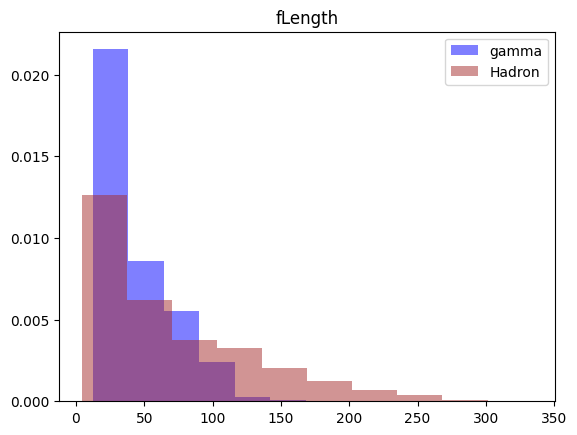

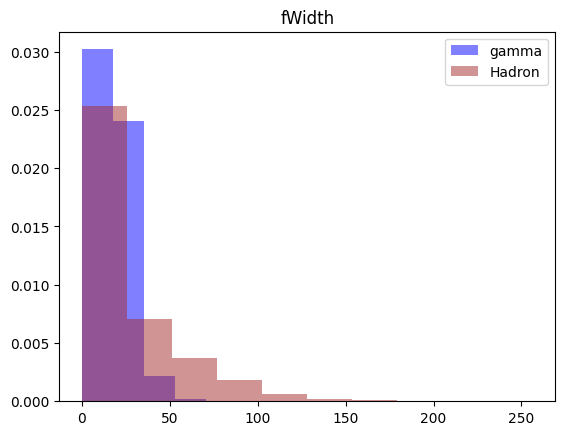

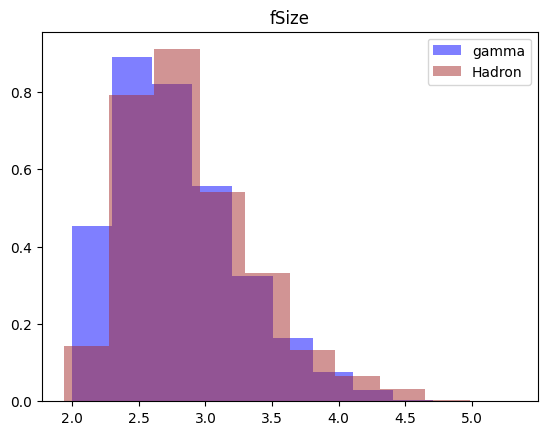

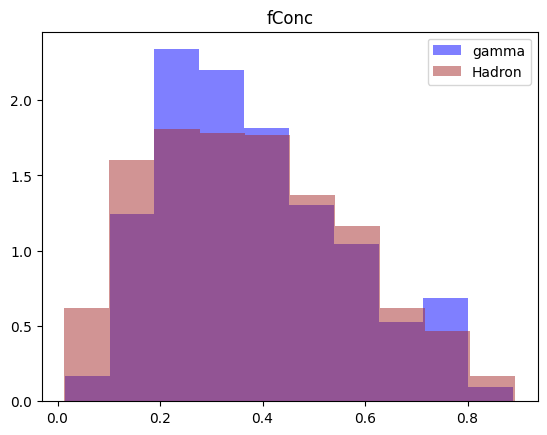

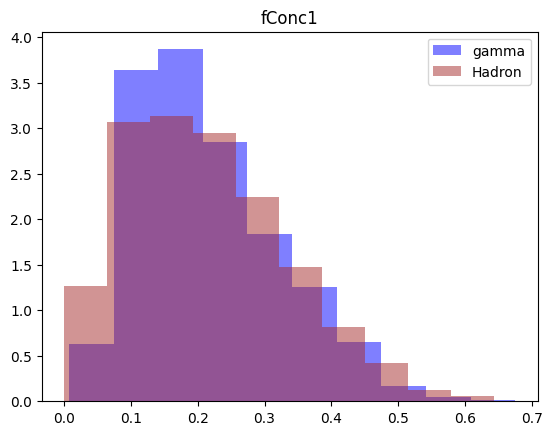

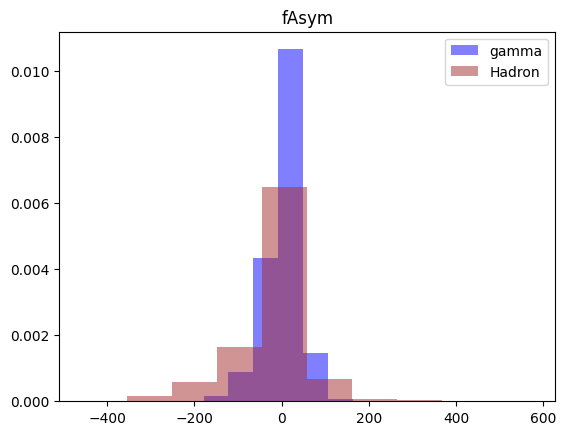

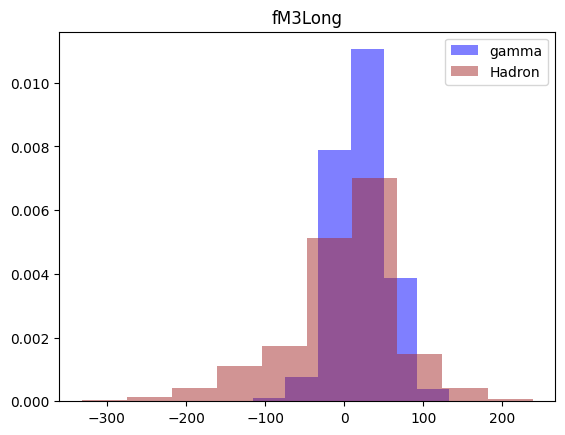

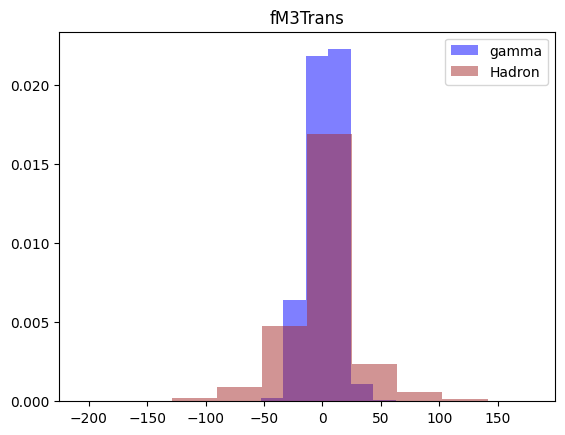

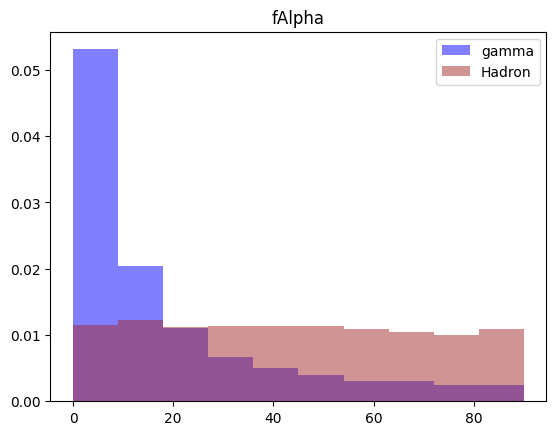

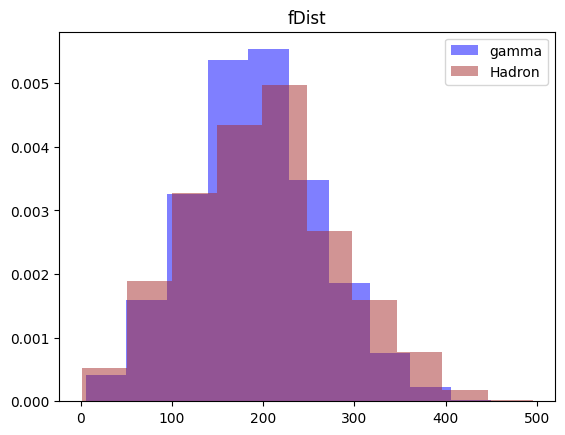

In [22]:
for label in label_column[:-1]:
  plt.hist(df[df["class"]==1][label], color = "blue", label = "gamma", alpha = 0.5, density = True)
  plt.hist(df[df["class"]==0][label], color = "brown", label = "Hadron", alpha = 0.5, density = True)
  plt.title(label)
  plt.legend()
  plt.show()


Now here i have plotted the graph for gamma probability density and hadron probability density for each label. i have set them to be this way so that it becomes easy to compare them. it is also necessary to not keep the graph bold/opaque so that i can compare each trend in data at every point.
 

# Dataset splitting into three parts:
**Train, Validation, Test**